
>>> Data Head:
             timestamp equipment_energy_consumption     lighting_energy  \
0  2016-01-11 17:00:00                         60.0  -77.78778596503064   
1  2016-01-11 17:10:00                         60.0                30.0   
2  2016-01-11 17:20:00                         50.0                30.0   
3  2016-01-11 17:30:00                         50.0                40.0   
4  2016-01-11 17:40:00                         60.0                40.0   

   zone1_temperature     zone1_humidity zone2_temperature  zone2_humidity  \
0  33.74660933896648  47.59666666666671              19.2       44.790000   
1              19.89  46.69333333333329              19.2       44.722500   
2              19.89               46.3              19.2       44.626667   
3  33.74660933896648   46.0666666666667              19.2       44.590000   
4              19.89  46.33333333333329              19.2       44.530000   

   zone3_temperature  zone3_humidity  zone4_temperature  ...  \
0     

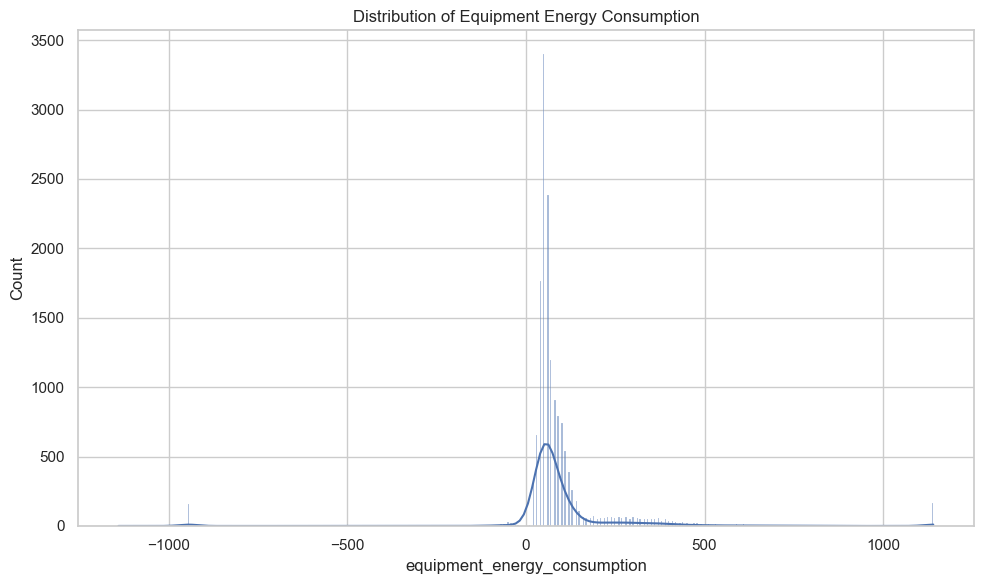

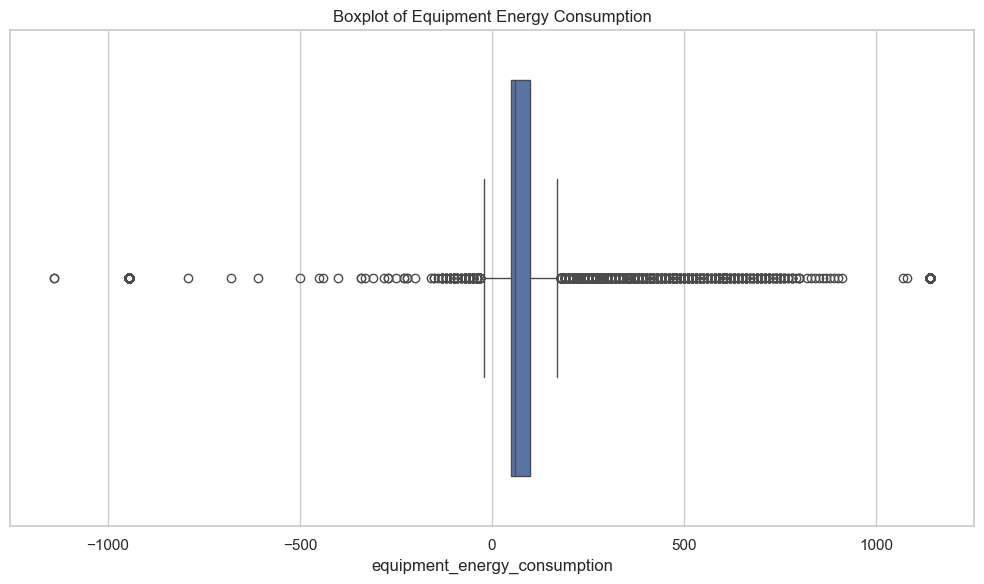

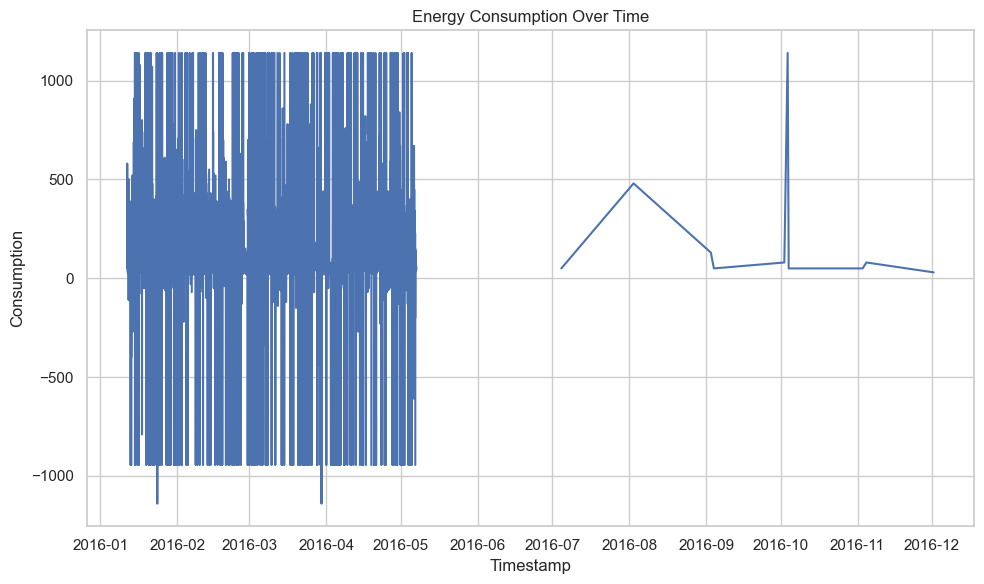

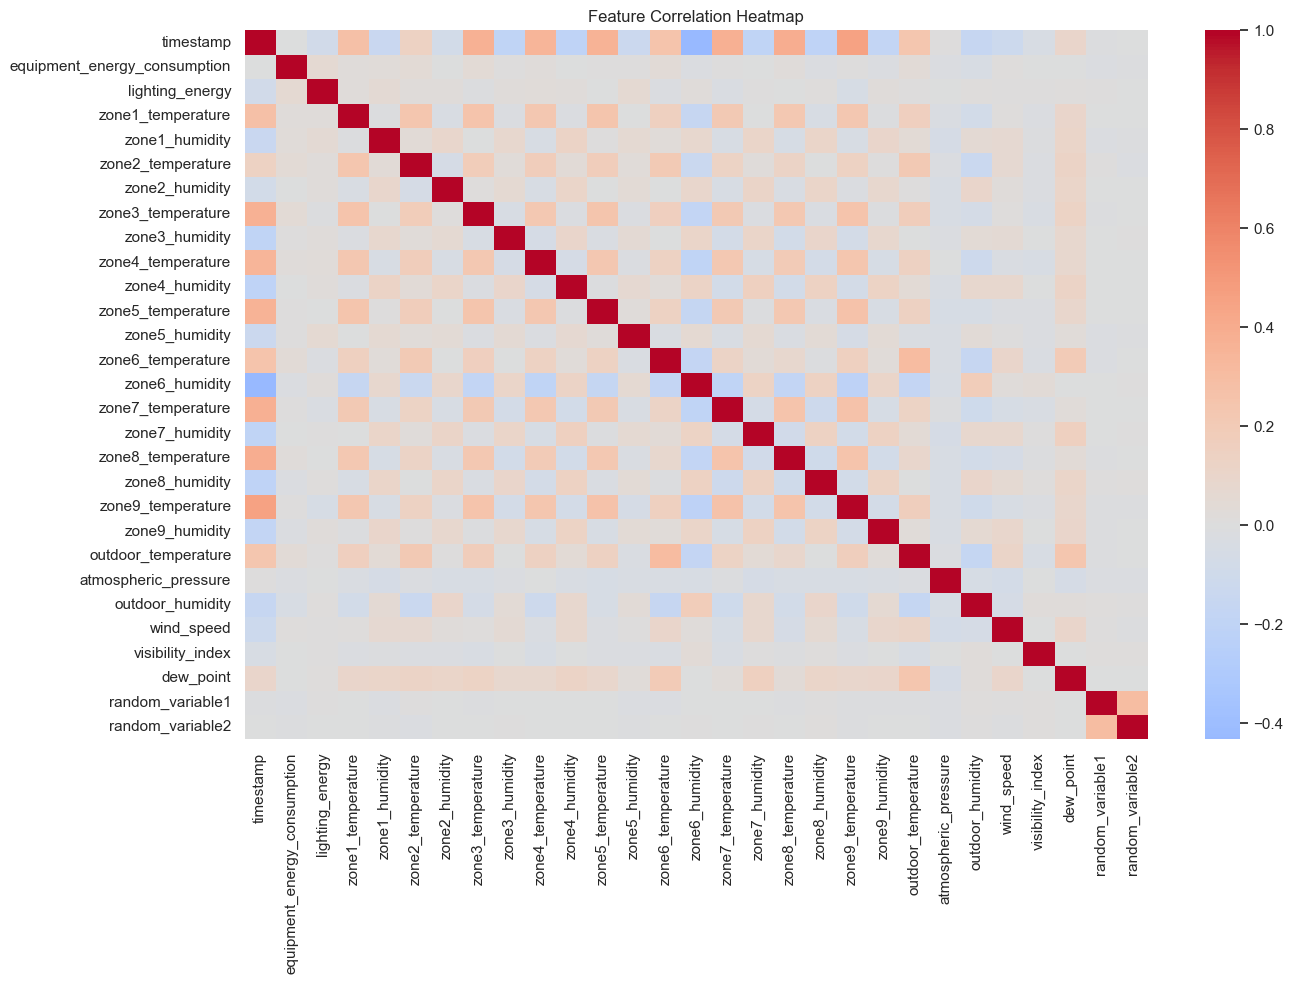

>>> Top positive correlations with target:
equipment_energy_consumption    1.000000
lighting_energy                 0.057007
zone2_temperature               0.042058
zone3_temperature               0.038033
outdoor_temperature             0.033223
zone6_temperature               0.032136
zone1_humidity                  0.026997
zone8_temperature               0.019716
zone1_temperature               0.018402
zone4_temperature               0.017128
Name: equipment_energy_consumption, dtype: float64 

>>> Top negative correlations with target:
zone2_humidity         -0.003984
timestamp              -0.004057
zone7_humidity         -0.006884
random_variable2       -0.011387
atmospheric_pressure   -0.014060
random_variable1       -0.016155
zone6_humidity         -0.019381
zone9_humidity         -0.022693
zone8_humidity         -0.023995
outdoor_humidity       -0.039493
Name: equipment_energy_consumption, dtype: float64 

EDA complete. Review plots & printed summaries for insights.


In [1]:
#!/usr/bin/env python3
"""
eda.py

Exploratory Data Analysis for Smart Factory Energy Prediction.
"""

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# If run from inside "notebooks/", move up to project root
if os.path.basename(os.getcwd()).lower() == "notebooks":
    os.chdir("..")

# Configure plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Path to your data file (relative to project root)
DATA_PATH = "data/data.csv"


def main():
    # 1. Load data
    df = pd.read_csv(DATA_PATH)
    print("\n>>> Data Head:")
    print(df.head(), "\n")

    # 2. Convert timestamp to datetime
    if "timestamp" in df.columns:
        df["timestamp"] = pd.to_datetime(df["timestamp"])
    else:
        print("Warning: 'timestamp' column not found.")

    # 3. Coerce all other columns to numeric (strings → floats, invalid → NaN)
    numeric_cols = df.columns.drop("timestamp", errors="ignore")
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")

    # 4. Basic overview
    print(">>> Shape:", df.shape)
    print("\n>>> Info:")
    df.info()
    print("\n>>> Summary statistics:")
    print(df.describe(), "\n")

    # 5. Missing values
    missing = df.isnull().sum()
    print(">>> Missing values (by column):")
    print(missing[missing > 0], "\n")

    # 6. Target distribution & outliers
    target = "equipment_energy_consumption"
    plt.figure()
    sns.histplot(df[target], kde=True)
    plt.title("Distribution of Equipment Energy Consumption")
    plt.xlabel(target)
    plt.tight_layout()
    plt.show()

    plt.figure()
    sns.boxplot(x=df[target])
    plt.title("Boxplot of Equipment Energy Consumption")
    plt.tight_layout()
    plt.show()

    # 7. Time-based trends
    if "timestamp" in df.columns:
        plt.figure()
        plt.plot(df["timestamp"], df[target])
        plt.title("Energy Consumption Over Time")
        plt.xlabel("Timestamp")
        plt.ylabel("Consumption")
        plt.tight_layout()
        plt.show()

    # 8. Correlation heatmap
    corr = df.corr()
    plt.figure(figsize=(14, 10))
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title("Feature Correlation Heatmap")
    plt.tight_layout()
    plt.show()

    # 9. Top correlated features
    target_corr = corr[target].sort_values(ascending=False)
    print(">>> Top positive correlations with target:")
    print(target_corr.head(10), "\n")
    print(">>> Top negative correlations with target:")
    print(target_corr.tail(10), "\n")

    # 10. (Optional) Pairplot for key features
    # top_feats = target_corr.index[1:5].tolist()
    # sns.pairplot(df[top_feats + [target]].dropna())
    # plt.show()

    print("EDA complete. Review plots & printed summaries for insights.")


if __name__ == "__main__":
    main()


In [4]:
import os
import pandas as pd

# 1. Ensure we're at the project root
if os.path.basename(os.getcwd()).lower() == "notebooks":
    os.chdir("..")
print("Working directory:", os.getcwd())

# 2. Load & coerce
df = pd.read_csv("data/data.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
num_cols = df.columns.drop("timestamp", errors="ignore")
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

# 3. Quantify missingness
missing_frac = df.isnull().mean().sort_values(ascending=False)
print("Missingness fraction per column:\n", missing_frac, "\n")

# 4. Bucket by severity
high_missing     = missing_frac[missing_frac > 0.5].index.tolist()
moderate_missing = missing_frac[(missing_frac > 0.1) & (missing_frac <= 0.5)].index.tolist()
low_missing      = missing_frac[missing_frac <= 0.1].index.tolist()

print("Columns >50% missing:", high_missing)
print("Columns 10–50% missing:", moderate_missing)
print("Columns <10% missing:", low_missing)


Working directory: C:\Users\pushp\DS-Intern-Assignment-Prateek
Missingness fraction per column:
 zone1_temperature               0.056297
zone2_temperature               0.054755
equipment_energy_consumption    0.054102
zone1_humidity                  0.052678
zone9_humidity                  0.052678
zone3_humidity                  0.052085
zone2_humidity                  0.051433
lighting_energy                 0.051255
zone6_temperature               0.050306
zone8_temperature               0.050306
zone6_humidity                  0.050246
atmospheric_pressure            0.049950
zone5_temperature               0.049712
wind_speed                      0.049119
dew_point                       0.049000
random_variable1                0.049000
random_variable2                0.048882
zone4_temperature               0.048407
visibility_index                0.048348
outdoor_temperature             0.047814
zone7_humidity                  0.047755
zone3_temperature               0.047577
z

In [5]:
# 12. Feature Engineering
# (requires df to be loaded & coerced as before)

# — Time‐based features —
df['hour']         = df['timestamp'].dt.hour
df['day_of_week']  = df['timestamp'].dt.dayofweek
df['is_weekend']   = (df['day_of_week'] >= 5).astype(int)
df['month']        = df['timestamp'].dt.month

# — Zone aggregates —
zone_temp_cols  = [f'zone{i}_temperature' for i in range(1,10)]
zone_humid_cols = [f'zone{i}_humidity'    for i in range(1,10)]

df['zone_temp_mean']  = df[zone_temp_cols].mean(axis=1)
df['zone_temp_std']   = df[zone_temp_cols].std(axis=1)
df['zone_humid_mean'] = df[zone_humid_cols].mean(axis=1)
df['zone_humid_std']  = df[zone_humid_cols].std(axis=1)

# — Interaction term example —
df['temp_humid_interaction'] = df['zone_temp_mean'] * df['zone_humid_mean']

# — Quick look at engineered features —
print(df[['hour','day_of_week','is_weekend','month',
          'zone_temp_mean','zone_temp_std',
          'zone_humid_mean','zone_humid_std',
          'temp_humid_interaction']].head())


   hour  day_of_week  is_weekend  month  zone_temp_mean  zone_temp_std  \
0    17            0           0      1       20.167076       5.584915   
1    17            0           0      1       17.149630       4.025668   
2    17            0           0      1       19.220143       8.018080   
3    17            0           0      1       18.571243       7.428061   
4    17            0           0      1       15.679242       5.916547   

   zone_humid_mean  zone_humid_std  temp_humid_interaction  
0        51.683333       13.741327             1042.301720  
1        51.985625       13.410043              891.534215  
2        50.628889       12.757790              973.094482  
3        55.663222       19.395616             1033.735219  
4        50.732963       13.355827              795.454401  
